In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 23.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
# Import Important Libraries
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow

In [ ]:
# Import Mediapipe libraries
import mediapipe as mp
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [ ]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

In [ ]:
# Function to process an image
def draw_landmarks(image_path):
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  results = hands.process(image_rgb)

  # Draw landmarks
  if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
      mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
  return image

In [ ]:
def extract_landmarks(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

    indices_to_extract = [0, 1, 2, 5, 9, 13, 17]
    landmark_names = {
        0: 'wrist',
        1: 'thumb_cmc',
        2: 'thumb_mcp',
        5: 'index_finger_mcp',
        9: 'middle_finger_mcp',
        13: 'ring_finger_mcp',
        17: 'pinky_mcp',
    }
    # indices_to_extract = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    # landmark_names = {
    #       0: 'wrist',
    #       1: 'thumb_cmc',
    #       2: 'thumb_mcp',
    #       3: 'thumb_ip',
    #       4: 'thumb_tip',
    #       5: 'index_finger_mcp',
    #       6: 'index_finger_pip',
    #       7: 'index_finger_dip',
    #       8: 'index_finger_tip',
    #       9: 'middle_finger_mcp',
    #       10: 'middle_finger_pip',
    #       11: 'middle_finger_dip',
    #       12: 'middle_finger_tip',
    #       13: 'ring_finger_mcp',
    #       14: 'ring_finger_pip',
    #       15: 'ring_finger_dip',
    #       16: 'ring_finger_tip',
    #       17: 'pinky_mcp',
    #       18: 'pinky_pip',
    #       19: 'pinky_dip',
    #       20: 'pink_tip'
    # }

    landmarks_data = []
    if results.multi_hand_landmarks:
        num_hands = min(2, len(results.multi_hand_landmarks))  # Maximum 2 hands
        for hand_idx in range(num_hands):
            landmarks = {}
            hand_landmarks = results.multi_hand_landmarks[hand_idx]
            for idx, landmark in enumerate(hand_landmarks.landmark):
                if idx in indices_to_extract:
                    landmark_name = landmark_names[idx]
                    landmarks[f'hand_{hand_idx}_{landmark_name}'] = {
                        'X': landmark.x,
                        'Y': landmark.y,
                        'Z': landmark.z if hasattr(landmark, 'z') else None
                    }
            landmarks_data.append(landmarks)
    return landmarks_data

###**Correct Hand Postures**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
correct_trial1 = '/content/drive/MyDrive/TESTS/TEST CASE/TestD_correct4.png'
sample_correct1 = '/content/drive/MyDrive/TESTS/TEST DATASET/correct1_frame_4.jpg'

In [ ]:
test_landmarks = extract_landmarks(correct_trial1)
sample_correct1_landmarks = extract_landmarks(sample_correct1)

Trial 1

In [ ]:
import pandas as pd
correct_trial1_data = []
for hand_idx, hand_landmarks in enumerate(test_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    first_trial1_data = pd.DataFrame(data)
    first_trial1_data['Hand'] = hand_idx
    trial1_data = correct_trial1_data.append(first_trial1_data)

trial1_data = pd.concat(correct_trial1_data, ignore_index=True)
print("Correct Hand Posture Trial 1 (Test D)")
trial1_data

Correct Hand Posture Trial 1 (Test D)


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.275549,0.282337,3.026254e-07,0
1,hand_0_thumb_cmc,0.372483,0.319813,6.343371e-03,0
2,hand_0_thumb_mcp,0.414709,0.404544,1.304500e-02,0
3,hand_0_index_finger_mcp,0.364287,0.509943,-3.824154e-02,0
4,hand_0_middle_finger_mcp,0.307381,0.528669,-2.582481e-02,0
5,hand_0_ring_finger_mcp,0.265927,0.523315,-6.523379e-03,0
6,hand_0_pinky_mcp,0.235852,0.506299,1.665369e-02,0
7,hand_1_wrist,0.835793,0.257622,6.879597e-07,1
8,hand_1_thumb_cmc,0.756811,0.287623,-2.442359e-02,1
9,hand_1_thumb_mcp,0.709221,0.377094,-3.477474e-02,1


Sample Dataset

In [ ]:
sample_correct1_data = []
for hand_idx, hand_landmarks in enumerate(sample_correct1_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial1_data = pd.DataFrame(data)
    sample_trial1_data['Hand'] = hand_idx
    sample1_data = sample_correct1_data.append(sample_trial1_data)

sample1_data = pd.concat(sample_correct1_data, ignore_index=True)
print("Correct Hand Posture from the Dataset")
sample1_data

Correct Hand Posture from the Dataset


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.301492,0.277429,1.356221e-07,0
1,hand_0_thumb_cmc,0.392924,0.270320,-3.555095e-03,0
2,hand_0_thumb_mcp,0.447935,0.369724,-1.027898e-03,0
3,hand_0_index_finger_mcp,0.425511,0.529966,-1.341495e-02,0
4,hand_0_middle_finger_mcp,0.379156,0.570224,-8.916934e-03,0
5,hand_0_ring_finger_mcp,0.336653,0.581566,-3.435302e-03,0
6,hand_0_pinky_mcp,0.299923,0.572836,3.125583e-03,0
7,hand_1_wrist,0.743021,0.150527,7.365705e-07,1
8,hand_1_thumb_cmc,0.662142,0.216421,-4.030352e-02,1
9,hand_1_thumb_mcp,0.628399,0.349475,-5.968273e-02,1


Separate the data by hand

In [ ]:
# Trial 1 (Test Case A)
test_hand0_data = trial1_data[trial1_data['Hand'] == 0]
test_hand1_data = trial1_data[trial1_data['Hand'] == 1]

In [ ]:
# Sample Image from the Dataset
sample_hand0_data = sample1_data[sample1_data['Hand'] == 0]
sample_hand1_data = sample1_data[sample1_data['Hand'] == 1]

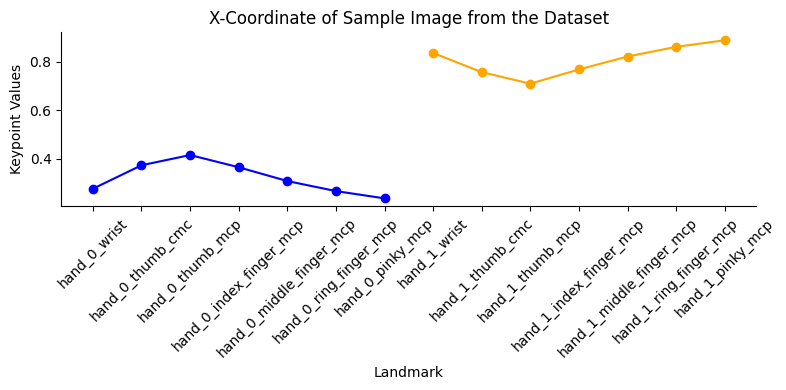

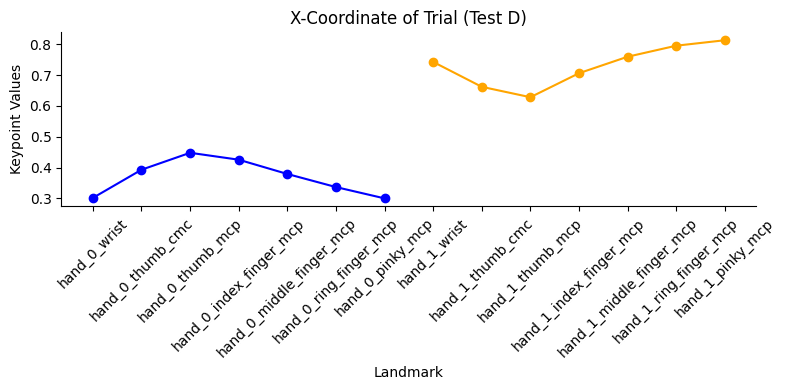

In [ ]:
# @title X-Coordinate

plt.figure(figsize=(8, 4))
test_hand0_data['X'].plot(kind='line', figsize=(8, 4), marker='o', color='blue')
test_hand1_data['X'].plot(kind='line', figsize=(8, 4), marker='o', color='orange')
plt.xticks(ticks=range(len(trial1_data['Landmark'])), labels=trial1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("X-Coordinate of Sample Image from the Dataset")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sample_hand0_data['X'].plot(kind='line', figsize=(8, 4),  marker='o', color='blue')
sample_hand1_data['X'].plot(kind='line', figsize=(8, 4),  marker='o', color='orange')
plt.xticks(ticks=range(len(sample1_data['Landmark'])), labels=sample1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("X-Coordinate of Trial (Test D)")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

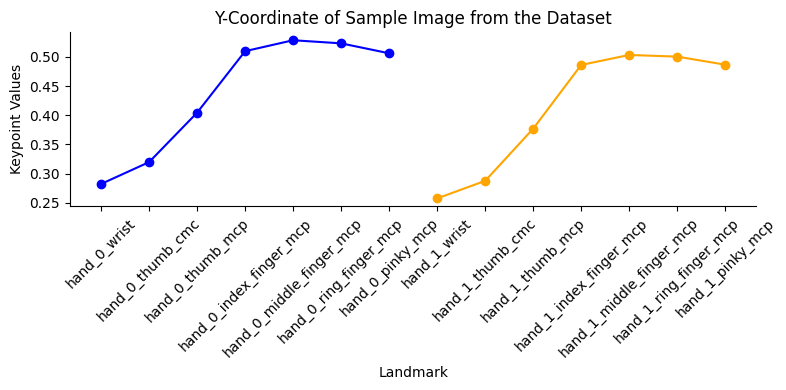

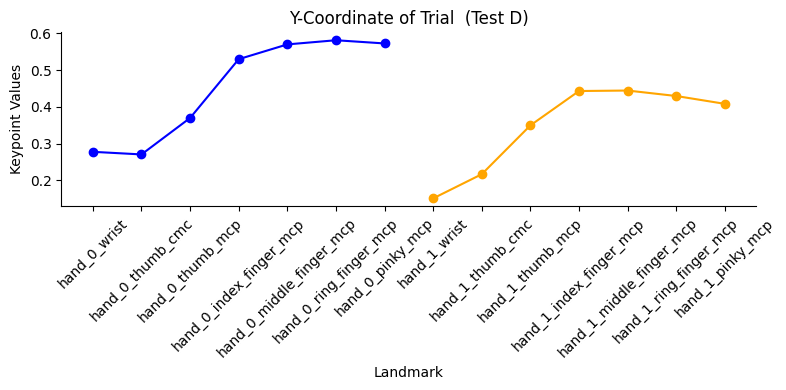

In [ ]:
# @title Y-Coordinate

plt.figure(figsize=(8, 4))
test_hand0_data['Y'].plot(kind='line', figsize=(8, 4), marker='o', label="Left Hand", color='blue')
test_hand1_data['Y'].plot(kind='line', figsize=(8, 4), marker='o', label="Right Hand", color='orange')
plt.xticks(ticks=range(len(trial1_data['Landmark'])), labels=trial1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Y-Coordinate of Sample Image from the Dataset")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sample_hand0_data['Y'].plot(kind='line', figsize=(8, 4), label="Left Hand", marker='o', color='blue')
sample_hand1_data['Y'].plot(kind='line', figsize=(8, 4), label="Right Hand", marker='o', color='orange')
plt.xticks(ticks=range(len(sample1_data['Landmark'])), labels=sample1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Y-Coordinate of Trial  (Test D)")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

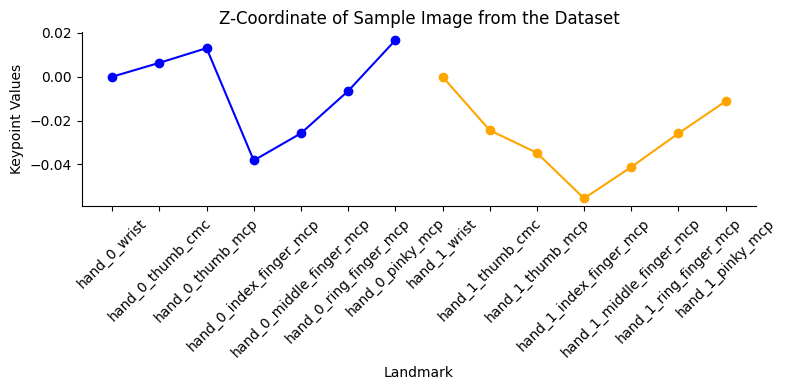

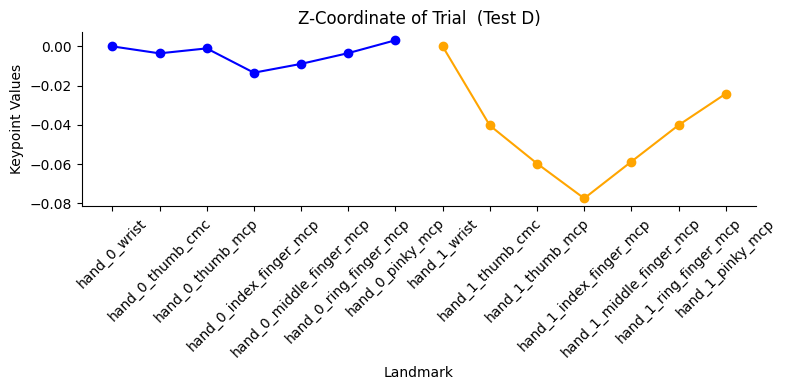

In [ ]:
# @title Z-Coordinate

plt.figure(figsize=(8, 4))
test_hand0_data['Z'].plot(kind='line', figsize=(8, 4), marker='o', label="Left Hand", color='blue')
test_hand1_data['Z'].plot(kind='line', figsize=(8, 4), marker='o', label="Right Hand", color='orange')
plt.xticks(ticks=range(len(trial1_data['Landmark'])), labels=trial1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Z-Coordinate of Sample Image from the Dataset")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sample_hand0_data['Z'].plot(kind='line', figsize=(8, 4), marker='o', label="Left Hand", color='blue')
sample_hand1_data['Z'].plot(kind='line', figsize=(8, 4), marker='o', label="Right Hand", color='orange')
plt.xticks(ticks=range(len(sample1_data['Landmark'])), labels=sample1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Z-Coordinate of Trial  (Test D)")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

###**Incorrect Hand Postures**

In [ ]:
incorrect_trial1 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Modified Hand Postures Dataset/TestD_incorrect18.png'
sample_incorrect1 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Modified Hand Postures Dataset/incorrect 4_frame_0043.jpg'

In [ ]:
test_inc1_landmarks = extract_landmarks(incorrect_trial1)
sample_incorrect1_landmarks = extract_landmarks(sample_incorrect1)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Trial 1

In [ ]:
import pandas as pd
incorrect_trial1_data = []
for hand_idx, hand_landmarks in enumerate(test_inc1_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    first_trial1_data = pd.DataFrame(data)
    first_trial1_data['Hand'] = hand_idx
    trial1_data = incorrect_trial1_data.append(first_trial1_data)

inc_trial1_data = pd.concat(incorrect_trial1_data, ignore_index=True)
print("Incorrect Hand Posture Trial 1 (Test A)")
inc_trial1_data

Incorrect Hand Posture Trial 1 (Test A)


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.718503,0.630085,1.695447e-07,0
1,hand_0_thumb_cmc,0.626576,0.661043,-3.330264e-03,0
2,hand_0_thumb_mcp,0.555105,0.622200,7.688199e-04,0
3,hand_0_index_finger_mcp,0.565417,0.475941,-2.499922e-02,0
4,hand_0_middle_finger_mcp,0.428322,0.329775,1.824885e-02,0
5,hand_0_ring_finger_mcp,0.644103,0.399652,-4.779731e-03,0
6,hand_0_pinky_mcp,0.680169,0.401150,8.951677e-03,0
7,hand_1_wrist,0.157812,0.674102,6.794560e-07,1
8,hand_1_thumb_cmc,0.236989,0.686853,-2.392724e-02,1
9,hand_1_thumb_mcp,0.302817,0.627904,-3.577305e-02,1


Sample Dataset

In [ ]:
sample_incorrect1_data = []
for hand_idx, hand_landmarks in enumerate(sample_incorrect1_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial1_data = pd.DataFrame(data)
    sample_trial1_data['Hand'] = hand_idx
    sample1_data = sample_incorrect1_data.append(sample_trial1_data)

inc_sample1_data = pd.concat(sample_incorrect1_data, ignore_index=True)
print("Incorrect Hand Posture from the Dataset")
inc_sample1_data

Incorrect Hand Posture from the Dataset


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.668926,0.664637,3.132465e-07,0
1,hand_0_thumb_cmc,0.597082,0.691284,-1.175373e-02,0
2,hand_0_thumb_mcp,0.531534,0.663251,-2.917816e-02,0
3,hand_0_index_finger_mcp,0.541996,0.515498,-5.259868e-02,0
4,hand_0_middle_finger_mcp,0.408011,0.375248,-7.087070e-02,0
5,hand_0_ring_finger_mcp,0.617673,0.417696,-5.473869e-02,0
6,hand_0_pinky_mcp,0.652134,0.404753,-5.478007e-02,0
7,hand_1_wrist,0.184503,0.691257,6.374933e-07,1
8,hand_1_thumb_cmc,0.259018,0.706055,-2.754111e-02,1
9,hand_1_thumb_mcp,0.318871,0.653893,-4.475560e-02,1


Separate the data by hand

In [ ]:
# Trial 1 (Test Case D)
test_hand0_data = inc_trial1_data[inc_trial1_data['Hand'] == 0]
test_hand1_data = inc_trial1_data[inc_trial1_data['Hand'] == 1]

In [ ]:
# Sample Image from the Dataset
sample_hand0_data = inc_sample1_data[inc_sample1_data['Hand'] == 0]
sample_hand1_data = inc_sample1_data[inc_sample1_data['Hand'] == 1]

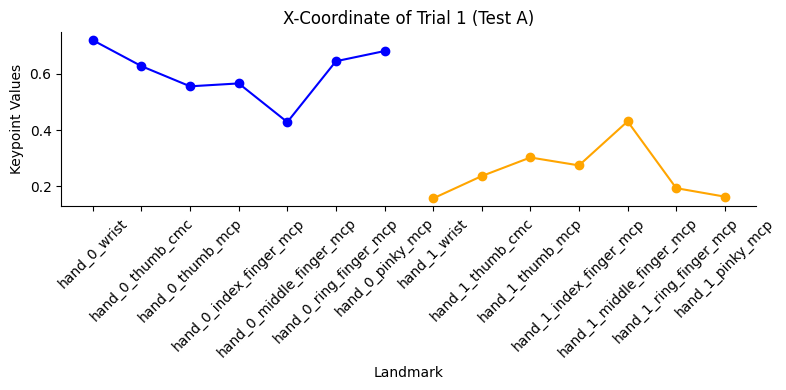

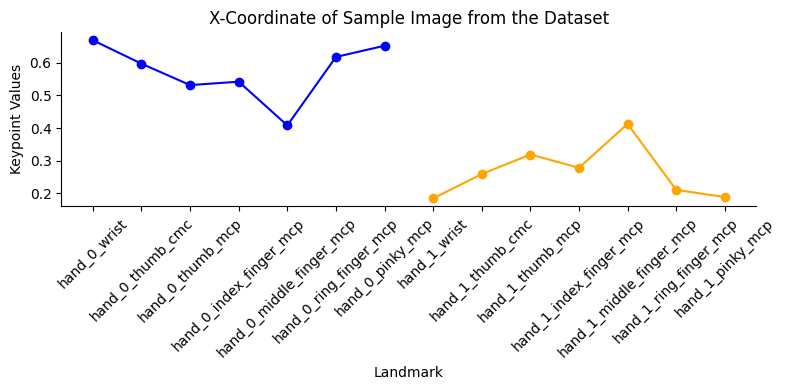

In [ ]:
# @title X-Coordinate

plt.figure(figsize=(8, 4))
test_hand0_data['X'].plot(kind='line', figsize=(8, 4), marker='o', color='blue')
test_hand1_data['X'].plot(kind='line', figsize=(8, 4), marker='o', color='orange')
plt.xticks(ticks=range(len(inc_trial1_data['Landmark'])), labels=inc_trial1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("X-Coordinate of Trial 1 (Test A)")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sample_hand0_data['X'].plot(kind='line', figsize=(8, 4), marker='o', color='blue')
sample_hand1_data['X'].plot(kind='line', figsize=(8, 4), marker='o', color='orange')
plt.xticks(ticks=range(len(inc_sample1_data['Landmark'])), labels=inc_sample1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("X-Coordinate of Sample Image from the Dataset")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

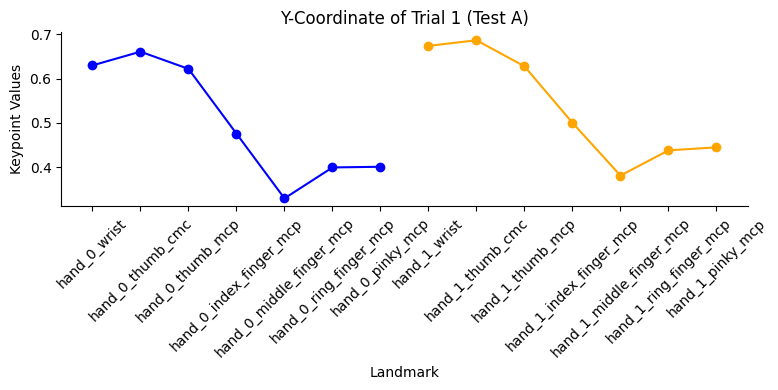

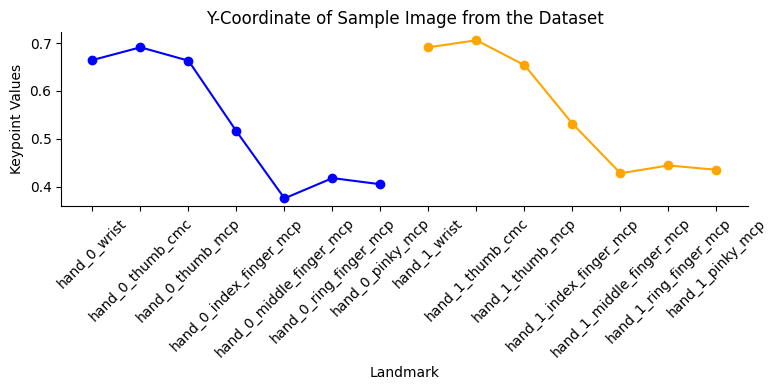

In [ ]:
# @title Y-Coordinate

plt.figure(figsize=(8, 4))
test_hand0_data['Y'].plot(kind='line', figsize=(8, 4), title='Y', marker='o', color='blue')
test_hand1_data['Y'].plot(kind='line', figsize=(8, 4), title='Y', marker='o', color='orange')
plt.xticks(ticks=range(len(inc_trial1_data['Landmark'])), labels=inc_trial1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Y-Coordinate of Trial 1 (Test A)")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sample_hand0_data['Y'].plot(kind='line', figsize=(8, 4), title='Y', marker='o', color='blue')
sample_hand1_data['Y'].plot(kind='line', figsize=(8, 4), title='Y', marker='o', color='orange')
plt.xticks(ticks=range(len(inc_sample1_data['Landmark'])), labels=inc_sample1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Y-Coordinate of Sample Image from the Dataset")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

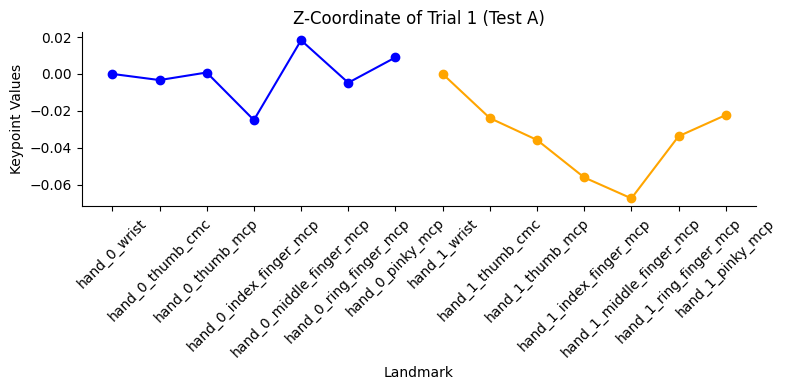

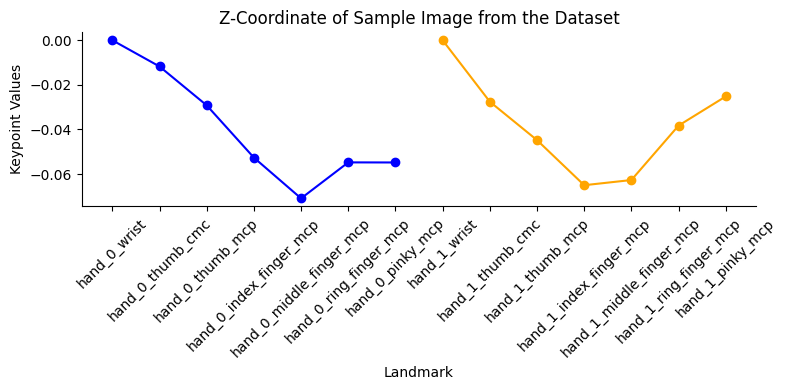

In [ ]:
# @title Z-Coordinate

plt.figure(figsize=(8, 4))
test_hand0_data['Z'].plot(kind='line', figsize=(8, 4), title='Z', marker='o', color='blue')
test_hand1_data['Z'].plot(kind='line', figsize=(8, 4), title='Z', marker='o', color='orange')
plt.xticks(ticks=range(len(inc_trial1_data['Landmark'])), labels=inc_trial1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Z-Coordinate of Trial 1 (Test A)")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sample_hand0_data['Z'].plot(kind='line', figsize=(8, 4), title='Z', marker='o', color='blue')
sample_hand1_data['Z'].plot(kind='line', figsize=(8, 4), title='Z', marker='o', color='orange')
plt.xticks(ticks=range(len(inc_sample1_data['Landmark'])), labels=inc_sample1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Z-Coordinate of Sample Image from the Dataset")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

#Using Heatmap

##**Correct Hand Posture**

###**Correct Hand Posture**

Trial 1

In [ ]:
correct_trial2 = '/content/drive/MyDrive/TESTS/TEST CASE/INCORRECT/Incorrect 30.png'
sample_correct2 = '/content/drive/MyDrive/TESTS/TEST DATASET/Incorrect 1_frame 3.png'

In [ ]:
test1_landmarks = extract_landmarks(correct_trial2)
sample_correct1_landmarks = extract_landmarks(sample_correct2)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
import pandas as pd
correct_trial1_data = []
for hand_idx, hand_landmarks in enumerate(test1_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    first_trial1_data = pd.DataFrame(data)
    first_trial1_data['Hand'] = hand_idx
    trial1_data = correct_trial1_data.append(first_trial1_data)

trial1_data = pd.concat(correct_trial1_data, ignore_index=True)
print("Correct Hand Posture Trial 1 (Test A)")
trial1_data

Correct Hand Posture Trial 1 (Test A)


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.364455,0.258519,3.915728e-07,0
1,hand_0_thumb_cmc,0.463735,0.241434,8.582282e-04,0
2,hand_0_thumb_mcp,0.526063,0.304610,2.585623e-03,0
3,hand_0_index_finger_mcp,0.507278,0.425057,-3.517887e-02,0
4,hand_0_middle_finger_mcp,0.454901,0.469636,-2.958983e-02,0
5,hand_0_ring_finger_mcp,0.409495,0.482802,-1.943181e-02,0
6,hand_0_pinky_mcp,0.367226,0.478720,-6.229537e-03,0
7,hand_1_wrist,0.860998,0.122945,7.022739e-07,1
8,hand_1_thumb_cmc,0.785357,0.172529,-3.598066e-02,1
9,hand_1_thumb_mcp,0.753239,0.278673,-4.531287e-02,1


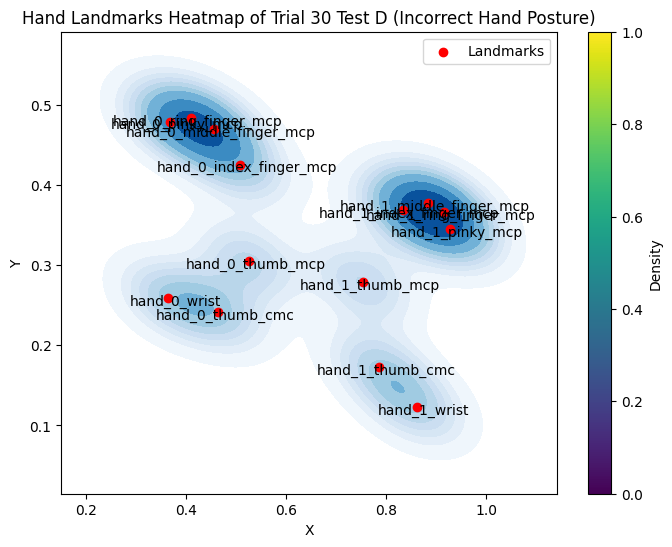

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=trial1_data['X'], y=trial1_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(trial1_data['X'], trial1_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(trial1_data['Landmark']):
    plt.annotate(landmark, (trial1_data['X'][i], trial1_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap of Trial 30 Test D (Incorrect Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Sample Dataset

In [ ]:
sample_correct1_data = []
for hand_idx, hand_landmarks in enumerate(sample_correct1_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial1_data = pd.DataFrame(data)
    sample_trial1_data['Hand'] = hand_idx
    sample1_data = sample_correct1_data.append(sample_trial1_data)

sample1_data = pd.concat(sample_correct1_data, ignore_index=True)
print("Correct Hand Posture from the Dataset")
sample1_data

Correct Hand Posture from the Dataset


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.314929,0.338446,4.356964e-07,0
1,hand_0_thumb_cmc,0.398269,0.295343,-2.847086e-02,0
2,hand_0_thumb_mcp,0.476474,0.291619,-5.008578e-02,0
3,hand_0_index_finger_mcp,0.475250,0.446752,-7.790852e-02,0
4,hand_0_middle_finger_mcp,0.440293,0.511838,-6.526435e-02,0
5,hand_0_ring_finger_mcp,0.407476,0.547468,-5.023033e-02,0
6,hand_0_pinky_mcp,0.377897,0.561946,-3.496978e-02,0
7,hand_1_wrist,0.794543,0.184643,8.324831e-07,1
8,hand_1_thumb_cmc,0.728093,0.237935,-5.070267e-02,1
9,hand_1_thumb_mcp,0.707639,0.339413,-6.893779e-02,1


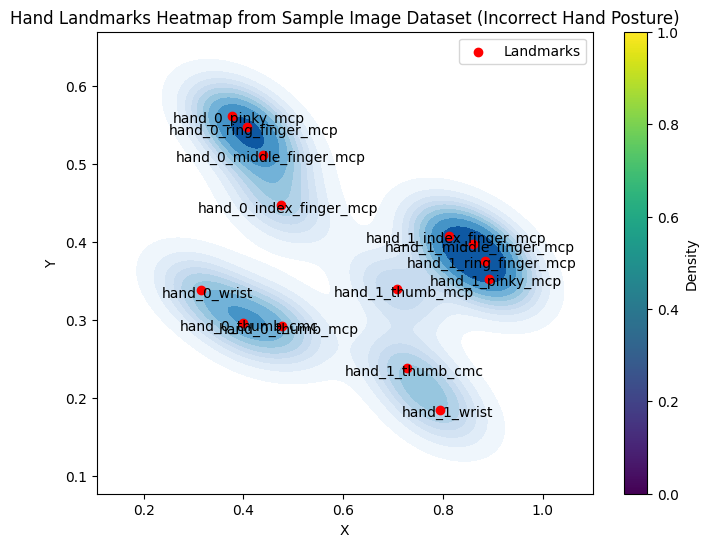

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=sample1_data['X'], y=sample1_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(sample1_data['X'], sample1_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(sample1_data['Landmark']):
    plt.annotate(landmark, (sample1_data['X'][i], sample1_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap from Sample Image Dataset (Incorrect Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

###**Incorrect Hand Posture**

Trial 2

In [ ]:
correct_trial2 = '/content/drive/MyDrive/TESTS/TEST CASE/INCORRECT/TestD_incorrect1.png'
sample_correct2 = '/content/drive/MyDrive/TESTS/TEST DATASET/incorrect 4_frame_1.jpg'

In [ ]:
test_landmarks = extract_landmarks(correct_trial2)
sample_correct2_landmarks = extract_landmarks(sample_correct2)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
import pandas as pd
correct_trial1_data = []
for hand_idx, hand_landmarks in enumerate(test_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    first_trial1_data = pd.DataFrame(data)
    first_trial1_data['Hand'] = hand_idx
    trial1_data = correct_trial1_data.append(first_trial1_data)

trial2_data = pd.concat(correct_trial1_data, ignore_index=True)
print("Correct Hand Posture Trial 1 (Test A)")
trial2_data

Correct Hand Posture Trial 1 (Test A)


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.341332,0.254048,5.152351e-07,0
1,hand_0_thumb_cmc,0.449394,0.260144,7.662634e-03,0
2,hand_0_thumb_mcp,0.502940,0.324543,1.084001e-02,0
3,hand_0_index_finger_mcp,0.470221,0.447780,-4.426326e-02,0
4,hand_0_middle_finger_mcp,0.414708,0.479598,-3.364111e-02,0
5,hand_0_ring_finger_mcp,0.370340,0.482152,-1.456646e-02,0
6,hand_0_pinky_mcp,0.333038,0.474193,9.988154e-03,0
7,hand_1_wrist,0.835065,0.179202,7.920135e-07,1
8,hand_1_thumb_cmc,0.762840,0.223817,-4.529109e-02,1
9,hand_1_thumb_mcp,0.730556,0.320722,-6.334344e-02,1


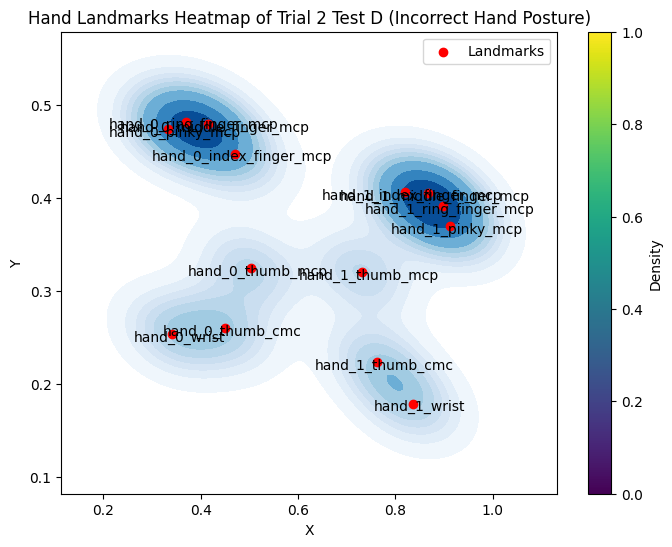

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=trial2_data['X'], y=trial2_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(trial2_data['X'], trial2_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(trial2_data['Landmark']):
    plt.annotate(landmark, (trial2_data['X'][i], trial2_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap of Trial 2 Test D (Incorrect Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Sample Dataset

In [ ]:
sample_correct2_data = []
for hand_idx, hand_landmarks in enumerate(sample_correct2_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial2_data = pd.DataFrame(data)
    sample_trial2_data['Hand'] = hand_idx
    sample1_data = sample_correct2_data.append(sample_trial2_data)

sample2_data = pd.concat(sample_correct2_data, ignore_index=True)
print("Correct Hand Posture from the Dataset")
sample2_data

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=sample2_data['X'], y=sample2_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(sample2_data['X'], sample2_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(sample2_data['Landmark']):
    plt.annotate(landmark, (sample2_data['X'][i], sample2_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap from Sample Image Dataset (Correct Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
sample_incorrect2_data = []
for hand_idx, hand_landmarks in enumerate(sample_incorrect2_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial2_data = pd.DataFrame(data)
    sample_trial2_data['Hand'] = hand_idx
    sample2_data = sample_incorrect2_data.append(sample_trial2_data)

inc_sample2_data = pd.concat(sample_incorrect2_data, ignore_index=True)
print("Incorrect Hand Posture from the Dataset")
inc_sample2_data

Incorrect Hand Posture from the Dataset


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.668926,0.664637,3.132465e-07,0
1,hand_0_thumb_cmc,0.597082,0.691284,-1.175373e-02,0
2,hand_0_thumb_mcp,0.531534,0.663251,-2.917816e-02,0
3,hand_0_index_finger_mcp,0.541996,0.515498,-5.259868e-02,0
4,hand_0_middle_finger_mcp,0.408011,0.375248,-7.087070e-02,0
5,hand_0_ring_finger_mcp,0.617673,0.417696,-5.473869e-02,0
6,hand_0_pinky_mcp,0.652134,0.404753,-5.478007e-02,0
7,hand_1_wrist,0.184503,0.691257,6.374933e-07,1
8,hand_1_thumb_cmc,0.259018,0.706055,-2.754111e-02,1
9,hand_1_thumb_mcp,0.318871,0.653893,-4.475560e-02,1


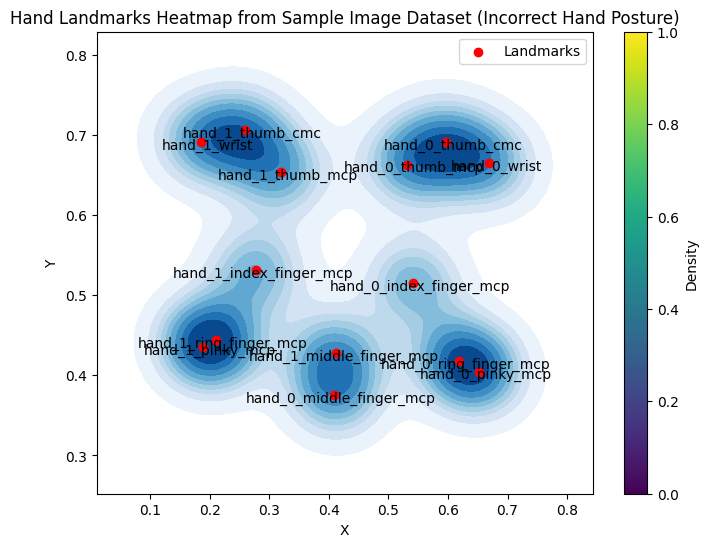

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=inc_sample2_data['X'], y=inc_sample2_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(inc_sample2_data['X'], inc_sample2_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(inc_sample2_data['Landmark']):
    plt.annotate(landmark, (inc_sample2_data['X'][i], inc_sample2_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap from Sample Image Dataset (Incorrect Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()